In [3]:
# Import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Import Tensorflow-related libraries and functions
import tensorflow as tf
from tensorflow.keras import optimizers

# Import Scikit-Learn machine learning functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, precision_score, f1_score, recall_score

print("Successful Import")

Successful Import


# Import Data

In [4]:
df = pd.read_csv(r'./SBAnational_CLEANED_num.csv')
df.head()

,Target_MIS_Status,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,1,84,4,1,1,1,103579.0,50000.0,25000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,84,17,1,1,1,93896.0,30000.0,15000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,84,7,1,1,1,136241.0,80000.0,40000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,34,5,1,1,0,81771.0,75000.0,37500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,37,5,1,1,0,185000.0,100000.0,50000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189019 entries, 0 to 189018
Data columns (total 82 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   Target_MIS_Status                                                                  189019 non-null  int64  
 1   Term                                                                               189019 non-null  int64  
 2   NoEmp                                                                              189019 non-null  int64  
 3   NewExist                                                                           189019 non-null  int64  
 4   UrbanRural                                                                         189019 non-null  int64  
 5   RevLineCr                                                                          189019 non

In [6]:
print(df.columns)

Index(['Target_MIS_Status', 'Term', 'NoEmp', 'NewExist', 'UrbanRural',
       'RevLineCr', 'DisbursementGross', 'GrAppv', 'SBA_Appv',
       'Industry_Accommodation and food services',
       'Industry_Administrative and support and waste management and remediation services',
       'Industry_Agriculture, forestry, fishing and hunting',
       'Industry_Arts, entertainment, and recreation', 'Industry_Construction',
       'Industry_Educational services', 'Industry_Finance and insurance',
       'Industry_Health care and social assistance', 'Industry_Information',
       'Industry_Management of companies and enterprises',
       'Industry_Manufacturing',
       'Industry_Mining, quarrying, and oil and gas extraction',
       'Industry_Other services (except public administration)',
       'Industry_Professional, scientific, and technical services',
       'Industry_Public administration',
       'Industry_Real estate and rental and leasing', 'Industry_Retail trade',
       'Industry_Tra

Binary Data Dictionary:

'Target_MIS_Status' : '0' = 'Default', '1' = 'Paid in Full'

'NewExist' : '0' = 'Existing Business', '2' = 'New Business'

'UrbanRural' : '0' = 'Urban', '2' = 'Rural'

'RevLineCr' : Revolving Line of Credit : '0' = 'No', '1' = 'Yes'

# Neural Network Prediction

## Data Sampling

In [7]:
neuralDf = df.copy()
neuralDf = neuralDf.sample(frac = 1) # 100% of data is randomly resuffled to ensure that it is not sorted.
neuralDf.head()

,Target_MIS_Status,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
185097,1,84,1,2,1,1,98830.0,50000.0,25000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138382,0,56,1,1,1,1,338101.0,100000.0,50000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50834,1,84,5,1,1,1,134818.0,25000.0,12500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82055,1,84,1,1,1,1,19310.0,10000.0,5000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80315,0,31,3,1,1,1,37335.0,25000.0,12500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Input Preparation 

### Scaling non-binary attributes

In [8]:
scaler = StandardScaler()

nonbinfeats = ['Term', 'NoEmp', 'DisbursementGross', 'GrAppv', 'SBA_Appv']

neuralDf_scaled = neuralDf.copy()
neuralDf_scaled[nonbinfeats] = scaler.fit_transform(neuralDf_scaled[nonbinfeats])
neuralDf_scaled.head()

,Target_MIS_Status,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
185097,1,0.426353,-0.187397,2,1,1,-0.066104,-0.191485,-0.213654,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138382,0,-0.319066,-0.187397,1,1,1,1.125259,0.093771,-0.023011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50834,1,0.426353,-0.039953,1,1,1,0.113085,-0.334113,-0.308976,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82055,1,0.426353,-0.187397,1,1,1,-0.462045,-0.419690,-0.366168,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80315,0,-0.984618,-0.113675,1,1,1,-0.372296,-0.334113,-0.308976,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
neuralDf_scaled.describe()

,Target_MIS_Status,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
count,189019.000000,1.890190e+05,1.890190e+05,189019.000000,189019.000000,189019.000000,1.890190e+05,1.890190e+05,1.890190e+05,189019.000000,...,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000
mean,0.614891,6.187491e-17,8.685888e-18,1.310784,1.168999,0.572170,1.598091e-17,-4.796621e-17,-1.620175e-17,0.087526,...,0.001619,0.009264,0.064200,0.030166,0.015046,0.004280,0.024400,0.020934,0.002217,0.001074
std,0.486622,1.000003e+00,1.000003e+00,0.462816,0.374752,0.494765,1.000003e+00,1.000003e+00,1.000003e+00,0.282604,...,0.040203,0.095801,0.245109,0.171045,0.121737,0.065282,0.154287,0.143165,0.047030,0.032754
min,0.000000,-1.809903e+00,-2.242576e-01,1.000000,1.000000,0.000000,-5.382753e-01,-4.710360e-01,-4.004842e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-5.852869e-01,-1.873968e-01,1.000000,1.000000,0.000000,-4.337135e-01,-3.626386e-01,-3.127885e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.068877e-01,-1.136751e-01,1.000000,1.000000,1.000000,-3.072434e-01,-2.770617e-01,-2.533079e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.263529e-01,-3.092490e-03,2.000000,1.000000,1.000000,-1.549347e-02,-4.885677e-02,-1.107071e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,7.774052e+00,2.946626e+02,2.000000,2.000000,1.000000,5.154846e+01,1.093351e+01,1.267380e+01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split data into train/test splits

In [10]:
X = neuralDf_scaled.drop(columns = ['Target_MIS_Status'])
y = neuralDf_scaled['Target_MIS_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (151215, 81)
X_test shape:  (37804, 81)
y_train shape:  (151215,)
y_test shape:  (37804,)


In [11]:
print(X_train.shape[1])

81


## Model Structure Optimization

We want to optimize a network with 3 hidden layers
- Each hidden layer can have from 64 to 256 nodes
- The step size between nodes is 64
- So the possibilities are: 64, 128, 192, 256

In [12]:
num_layers = 3
min_nodes_per_layer, max_nodes_per_layer = 64, 256
node_step_size = 64

In [13]:
node_options = list(range(
    min_nodes_per_layer, 
    max_nodes_per_layer + 1, 
    node_step_size
))
node_options

[64, 128, 192, 256]

In [14]:
three_layer_possibilities = [node_options, node_options, node_options]
three_layer_possibilities

[[64, 128, 192, 256], [64, 128, 192, 256], [64, 128, 192, 256]]

In [15]:
# Return all permutations between the three lists
layer_node_permutations = list(itertools.product(*three_layer_possibilities))
layer_node_permutations

[(64, 64, 64),
 (64, 64, 128),
 (64, 64, 192),
 (64, 64, 256),
 (64, 128, 64),
 (64, 128, 128),
 (64, 128, 192),
 (64, 128, 256),
 (64, 192, 64),
 (64, 192, 128),
 (64, 192, 192),
 (64, 192, 256),
 (64, 256, 64),
 (64, 256, 128),
 (64, 256, 192),
 (64, 256, 256),
 (128, 64, 64),
 (128, 64, 128),
 (128, 64, 192),
 (128, 64, 256),
 (128, 128, 64),
 (128, 128, 128),
 (128, 128, 192),
 (128, 128, 256),
 (128, 192, 64),
 (128, 192, 128),
 (128, 192, 192),
 (128, 192, 256),
 (128, 256, 64),
 (128, 256, 128),
 (128, 256, 192),
 (128, 256, 256),
 (192, 64, 64),
 (192, 64, 128),
 (192, 64, 192),
 (192, 64, 256),
 (192, 128, 64),
 (192, 128, 128),
 (192, 128, 192),
 (192, 128, 256),
 (192, 192, 64),
 (192, 192, 128),
 (192, 192, 192),
 (192, 192, 256),
 (192, 256, 64),
 (192, 256, 128),
 (192, 256, 192),
 (192, 256, 256),
 (256, 64, 64),
 (256, 64, 128),
 (256, 64, 192),
 (256, 64, 256),
 (256, 128, 64),
 (256, 128, 128),
 (256, 128, 192),
 (256, 128, 256),
 (256, 192, 64),
 (256, 192, 128),
 (2

In [16]:
# Iterate over the permutations and then iterate again over the values of individual permutation to get the node count for each hidden layer:
for permutation in layer_node_permutations[:2]:
    for nodes_at_layer in permutation:
        print(nodes_at_layer)
    print()

64
64
64

64
64
128



- Create a new Sequential model at each iteration, adding an InputLayer to it with a shape of (81,) (the number of columns in our dataset)
- Then, iterate over the items in a single permutation and add a Dense layer to the model with the current number of nodes
- Finally, add a Dense output layer
- Set a name to the model so it's easier to compare them later:

In [17]:
models = []

for permutation in layer_node_permutations:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    model_name = ''
    
    for nodes_at_layer in permutation:
        model.add(tf.keras.layers.Dense(nodes_at_layer, activation='relu'))
        model_name += f'dense{nodes_at_layer}_'
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model._name = model_name[:-1]
    
    models.append(model)

In [18]:
models[0].summary()

Model: "dense64_dense64_dense64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5248      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13633 (53.25 KB)
Trainable params: 13633 (53.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
models[1].summary()

Model: "dense64_dense64_dense128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                5248      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17857 (69.75 KB)
Trainable params: 17857 (69.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Define function to get architecture possibilities 
def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'sigmoid') -> list:
    
    node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
    layer_possibilities = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilities))
    
    models = []
    for permutation in layer_node_permutations:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
        model_name = ''

        for nodes_at_layer in permutation:
            model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
            model_name += f'dense{nodes_at_layer}_'

        model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation))
        model._name = model_name[:-1]
        models.append(model)
        
    return models

In [21]:
all_models = get_models(
    num_layers=3, 
    min_nodes_per_layer=64, 
    max_nodes_per_layer=256, 
    node_step_size=64, 
    input_shape=(12,)
)

In [22]:
print(f'#Models = {len(all_models)}')
print()

for model in all_models:
    print(model.name)

#Models = 64

dense64_dense64_dense64
dense64_dense64_dense128
dense64_dense64_dense192
dense64_dense64_dense256
dense64_dense128_dense64
dense64_dense128_dense128
dense64_dense128_dense192
dense64_dense128_dense256
dense64_dense192_dense64
dense64_dense192_dense128
dense64_dense192_dense192
dense64_dense192_dense256
dense64_dense256_dense64
dense64_dense256_dense128
dense64_dense256_dense192
dense64_dense256_dense256
dense128_dense64_dense64
dense128_dense64_dense128
dense128_dense64_dense192
dense128_dense64_dense256
dense128_dense128_dense64
dense128_dense128_dense128
dense128_dense128_dense192
dense128_dense128_dense256
dense128_dense192_dense64
dense128_dense192_dense128
dense128_dense192_dense192
dense128_dense192_dense256
dense128_dense256_dense64
dense128_dense256_dense128
dense128_dense256_dense192
dense128_dense256_dense256
dense192_dense64_dense64
dense192_dense64_dense128
dense192_dense64_dense192
dense192_dense64_dense256
dense192_dense128_dense64
dense192_dense128_dense12

In [23]:
# Define function to accept the list of models, data sets, and number of epochs; ultimately to optimize a model
def optimize(models: list,
             X_train: np.array,
             y_train: np.array,
             X_test: np.array,
             y_test: np.array,
             epochs: int = 100,
             verbose: int = 0) -> pd.DataFrame:
    
    # Store the results here
    results = []
    
    def train(model: tf.keras.Sequential) -> dict:
        learning_rate = 0.001
        optimizer = optimizers.SGD(learning_rate)
        model.compile(
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            optimizer=optimizer,
            metrics=['accuracy']) 
               
        # Train the model
        model.fit(
            X_train,
            y_train,
            epochs=epochs,
            verbose=verbose
        )
        
        # Make predictions on the test set
        preds = model.predict(X_test)
        prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)] # Selecting a baseline threshold of 0.5 as this is a binary classification problem
        
        # Return evaluation metrics on the test set
        return {
            'model_name': model.name,
            'test_accuracy': accuracy_score(y_test, prediction_classes),
            'test_precision': precision_score(y_test, prediction_classes),
            'test_recall': recall_score(y_test, prediction_classes),
            'test_f1': f1_score(y_test, prediction_classes)
        }
    
    # Train every model and save results
    for model in models:
        try:
            print(model.name, end=' ... ')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')
        
    return pd.DataFrame(results)

In [26]:
# Define function to accept the list of models, data sets, and number of epochs; ultimately to optimize a model
def optimize_v2(models: list,
             X_train: np.array,
             y_train: np.array,
             X_test: np.array,
             y_test: np.array,
             epochs: int = 100,
             verbose: int = 0) -> pd.DataFrame:
    
    # Store the results here
    results = []
    
    def train(model: tf.keras.Sequential) -> dict:
        learning_rate = 0.001
        optimizer = optimizers.Adam(learning_rate)
        model.compile(
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
            optimizer=optimizer,
            metrics=['accuracy']) 
               
        # Train the model
        history = model.fit(
            X_train,
            y_train,
            validation_split = 0.25,
            epochs=epochs,
            verbose=verbose
        )
        
       # Extract final training and validation metrics from history
        train_loss = history.history['loss'][-1]
        train_accuracy = history.history['accuracy'][-1]
        val_loss = history.history['val_loss'][-1]
        val_accuracy = history.history['val_accuracy'][-1]
        
        # Return metrics
        return {
            'model_name': model.name,
            'train_loss': train_loss,
            'train_accuracy': train_accuracy,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy
        }
    
    # Train every model and save results
    for model in models:
        try:
            print(model.name, end=' ... ')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')
        
    return pd.DataFrame(results)

In [27]:
# Perform optimization (takes very long runtime 537 min)
optimization_results = optimize_v2(
    models=models,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

dense64_dense64_dense64 ... 

dense64_dense64_dense128 ... 

dense64_dense64_dense192 ... 

dense64_dense64_dense256 ... 

dense64_dense128_dense64 ... 

dense64_dense128_dense128 ... 

dense64_dense128_dense192 ... 

dense64_dense128_dense256 ... 

dense64_dense192_dense64 ... 

dense64_dense192_dense128 ... 

dense64_dense192_dense192 ... 

dense64_dense192_dense256 ... 

dense64_dense256_dense64 ... 

dense64_dense256_dense128 ... 

dense64_dense256_dense192 ... 

dense64_dense256_dense256 ... 

dense128_dense64_dense64 ... 

dense128_dense64_dense128 ... 

dense128_dense64_dense192 ... 

dense128_dense64_dense256 ... 

dense128_dense128_dense64 ... 

dense128_dense128_dense128 ... 

dense128_dense128_dense192 ... 

dense128_dense128_dense256 ... 

dense128_dense192_dense64 ... 

dense128_dense192_dense128 ... 

dense128_dense192_dense192 ... 

dense128_dense192_dense256 ... 

dense128_dense256_dense64 ... 

dense128_dense256_dense128 ... 

dense128_dense256_dense192 ... 

dense128_dense256_dense256 ... 

dense192_dense64_dense64 ... 

dense192_dense64_dense128 ... 

dense192_dense64_dense192 ... 

dense192_dense64_dense256 ... 

dense192_dense128_dense64 ... 

dense192_dense128_dense128 ... 

dense192_dense128_dense192 ... 

dense192_dense128_dense256 ... 

dense192_dense192_dense64 ... 

dense192_dense192_dense128 ... 

dense192_dense192_dense192 ... 

dense192_dense192_dense256 ... 

dense192_dense256_dense64 ... 

dense192_dense256_dense128 ... 

dense192_dense256_dense192 ... 

dense192_dense256_dense256 ... 

dense256_dense64_dense64 ... 

dense256_dense64_dense128 ... 

dense256_dense64_dense192 ... 

dense256_dense64_dense256 ... 

dense256_dense128_dense64 ... 

dense256_dense128_dense128 ... 

dense256_dense128_dense192 ... 

dense256_dense128_dense256 ... 

dense256_dense192_dense64 ... 

dense256_dense192_dense128 ... 

dense256_dense192_dense192 ... 

dense256_dense192_dense256 ... 

dense256_dense256_dense64 ... 

dense256_dense256_dense128 ... 

dense256_dense256_dense192 ... 

dense256_dense256_dense256 ... 

In [33]:
optimization_results.sort_values(by='val_loss', ascending=True)

,model_name,train_loss,train_accuracy,val_loss,val_accuracy
7,dense64_dense128_dense256,0.219567,0.914788,0.220987,0.917390
14,dense64_dense256_dense192,0.211406,0.918156,0.221878,0.916676
37,dense192_dense128_dense128,0.208788,0.919567,0.223856,0.916940
57,dense256_dense192_dense128,0.214146,0.917530,0.224822,0.915406
1,dense64_dense64_dense128,0.204545,0.923041,0.225356,0.918607
...,...,...,...,...,...
45,dense192_dense256_dense128,0.218983,0.914188,0.255665,0.905857
6,dense64_dense128_dense192,0.217361,0.915687,0.257862,0.903000
8,dense64_dense192_dense64,0.219043,0.914682,0.261434,0.900196
2,dense64_dense64_dense192,0.204730,0.922080,0.262841,0.902656


A 64,64,128 node three hidden layer model appears to be the optimal model structure base on train and validation loss.

## Optimal Three Hidden Layer Model

In [50]:
three_layer_model = models[1]

In [35]:
for model in models:
    print(model.name,' , ', model)

dense64_dense64_dense64  ,  <keras.src.engine.sequential.Sequential object at 0x28b358fa0>
dense64_dense64_dense128  ,  <keras.src.engine.sequential.Sequential object at 0x28b54b100>
dense64_dense64_dense192  ,  <keras.src.engine.sequential.Sequential object at 0x28b4d4eb0>
dense64_dense64_dense256  ,  <keras.src.engine.sequential.Sequential object at 0x2a140e1f0>
dense64_dense128_dense64  ,  <keras.src.engine.sequential.Sequential object at 0x2a141c8b0>
dense64_dense128_dense128  ,  <keras.src.engine.sequential.Sequential object at 0x2a14288e0>
dense64_dense128_dense192  ,  <keras.src.engine.sequential.Sequential object at 0x2a144ff70>
dense64_dense128_dense256  ,  <keras.src.engine.sequential.Sequential object at 0x2a1460d30>
dense64_dense192_dense64  ,  <keras.src.engine.sequential.Sequential object at 0x2a1475ca0>
dense64_dense192_dense128  ,  <keras.src.engine.sequential.Sequential object at 0x2a149a520>
dense64_dense192_dense192  ,  <keras.src.engine.sequential.Sequential object 

Optimal model is second in the list of models.

In [36]:
models[1].summary()

Model: "dense64_dense64_dense128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                5248      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17857 (69.75 KB)
Trainable params: 17857 (69.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
epochs = 100
verbose = 0

history = models[1].fit(X_train, y_train, validation_split = 0.25,epochs = epochs, verbose = 0)

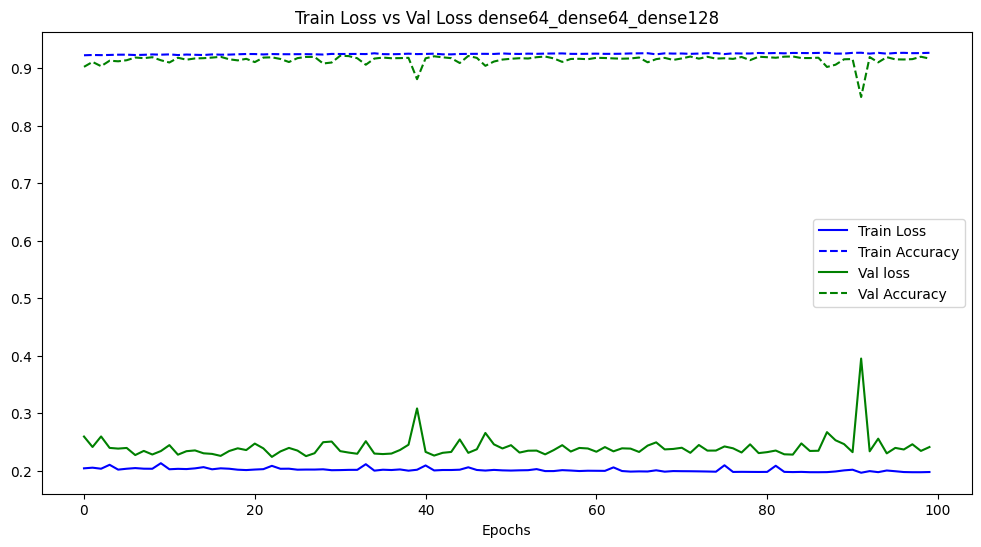

In [38]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label = 'Train Loss', color = 'b')
plt.plot(history.history['accuracy'], label = 'Train Accuracy', linestyle = 'dashed', color = 'b')
plt.plot(history.history['val_loss'], label = 'Val loss', color = 'g')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy', linestyle = 'dashed', color = 'g')
plt.title(f'Train Loss vs Val Loss {models[1].name}')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [39]:
loss, accuracy = models[1].evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1182/1182 [==============================] - 0s 263us/step - loss: 0.2449 - accuracy: 0.9153
Accuracy: 91.53


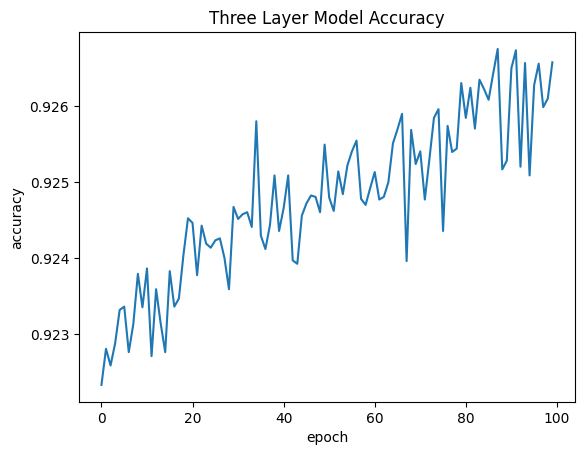

In [40]:
plt.plot(history.history['accuracy'])
plt.title('Three Layer Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

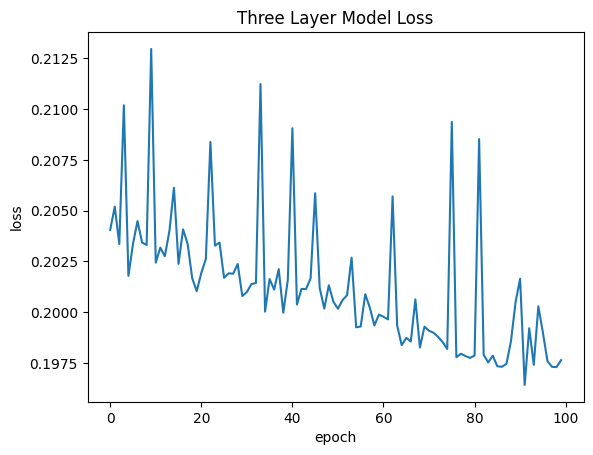

In [41]:
plt.plot(history.history['loss'])
plt.title('Three Layer Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [56]:
preds = models[1].predict(X_test)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]

1182/1182 [==============================] - 0s 244us/step


In [57]:
metrics_dict = {'test_accuracy': np.round(accuracy_score(y_test, prediction_classes),2),
'test_precision': np.round(precision_score(y_test, prediction_classes),2),
'test_recall': np.round(recall_score(y_test, prediction_classes),2),
'test_f1': np.round(f1_score(y_test, prediction_classes),2)}

print(f"'{three_layer_model._name}' Model Metrics")
print('-'*150)
print(metrics_dict)
print('='*150)

'dense64_dense64_dense128' Model Metrics
------------------------------------------------------------------------------------------------------------------------------------------------------
{'test_accuracy': 0.92, 'test_precision': 0.95, 'test_recall': 0.91, 'test_f1': 0.93}


In [45]:
print(np.unique(prediction_classes, return_counts = True))

(array([0, 1]), array([15398, 22406]))


In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, prediction_classes)
#print(cm)
cmtx = pd.DataFrame(cm, index = ['True: 0', 'True: 1'], columns = ['Pred: 0', 'Pred: 1'])
print('Confusion Matrix')
print(cmtx)

Confusion Matrix
         Pred: 0  Pred: 1
True: 0    13396     1201
True: 1     2002    21205


1182/1182 [==============================] - 0s 249us/step

Best Threshold = 0.516337, G-Mean=0.916


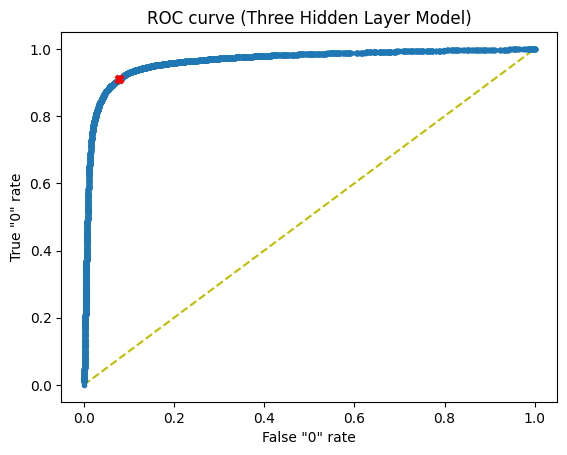

In [47]:
# ROC Curve
y_preds = models[1].predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('\nBest Threshold = %f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


plt.figure()
plt.plot([0,1],[0,1],'y--', zorder = 1)
plt.plot(fpr, tpr, marker = '.', zorder = 2)
plt.scatter(fpr[ix], tpr[ix], marker='X', color='red', label='Best Treshold Ratio', zorder = 3)
plt.xlabel('False "0" rate')
plt.ylabel('True "0" rate')
plt.title('ROC curve (Three Hidden Layer Model)')
plt.show()

$$\text{Geometric Mean} = \sqrt[n]{\prod_{i=1}^{n} x_i} = \sqrt[n]{x_1 \cdot x_2 \cdot \ldots \cdot x_n}


See if we can optimize accuracy by changing threshold based on optimal geometric mean (G-Mean) Ratio. Based on ROC curve above, that threshold seems to be 0.52

In [58]:
preds = models[1].predict(X_test)
prediction_classes = [1 if prob > thresholds[ix] else 0 for prob in np.ravel(preds)]

1182/1182 [==============================] - 0s 251us/step


In [59]:
metrics_dict = {'test_accuracy': np.round(accuracy_score(y_test, prediction_classes),2),
'test_precision': np.round(precision_score(y_test, prediction_classes),2),
'test_recall': np.round(recall_score(y_test, prediction_classes),2),
'test_f1': np.round(f1_score(y_test, prediction_classes),2)}

print(f"'{three_layer_model._name}' Model Metrics")
print('-'*150)
print(metrics_dict)
print('='*150)

'dense64_dense64_dense128' Model Metrics
------------------------------------------------------------------------------------------------------------------------------------------------------
{'test_accuracy': 0.92, 'test_precision': 0.95, 'test_recall': 0.91, 'test_f1': 0.93}


In [60]:
# Confusion Matrix
cm = confusion_matrix(y_test, prediction_classes)
#print(cm)
cmtx = pd.DataFrame(cm, index = ['True: 0', 'True: 1'], columns = ['Pred: 0', 'Pred: 1'])
print('Confusion Matrix')
print(cmtx)

Confusion Matrix
         Pred: 0  Pred: 1
True: 0    13445     1152
True: 1     2054    21153


## One Hidden Layer Model for Comparison (Shallow Neural Network)

In [67]:
singleLayerNodes = [100] # Number of nodes for the hidden layer

# Initiate Sequential model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],))) # Input Layer
model1_name = ''

# Add hidden layer(s)    
for nodes_at_layer in singleLayerNodes:
    model1.add(tf.keras.layers.Dense(nodes_at_layer, activation='relu'))
    model1_name += f'dense{nodes_at_layer}_'
        
model1.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output Layer
model1._name = model1_name[:-1]

In [68]:
print(model1._name)

dense100


In [69]:
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
    optimizer=optimizer, metrics=['accuracy'])
model1.summary()

Model: "dense100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_514 (Dense)           (None, 100)               8200      
                                                                 
 dense_515 (Dense)           (None, 1)                 101       
                                                                 
Total params: 8301 (32.43 KB)
Trainable params: 8301 (32.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# Train model
epochs = 100

history1 = model1.fit(X_train, y_train, validation_split = 0.25,epochs = epochs) #, batch_size = batch_size)

Epoch 1/100
3545/3545 [==============================] - 2s 408us/step - loss: 0.4994 - accuracy: 0.7877 - val_loss: 0.4334 - val_accuracy: 0.8136
Epoch 2/100
3545/3545 [==============================] - 1s 375us/step - loss: 0.4314 - accuracy: 0.8160 - val_loss: 0.4216 - val_accuracy: 0.8272
Epoch 3/100
3545/3545 [==============================] - 1s 372us/step - loss: 0.4220 - accuracy: 0.8193 - val_loss: 0.4157 - val_accuracy: 0.8163
Epoch 4/100
3545/3545 [==============================] - 1s 377us/step - loss: 0.4125 - accuracy: 0.8235 - val_loss: 0.4003 - val_accuracy: 0.8283
Epoch 5/100
3545/3545 [==============================] - 1s 373us/step - loss: 0.4046 - accuracy: 0.8259 - val_loss: 0.3950 - val_accuracy: 0.8372
Epoch 6/100
3545/3545 [==============================] - 1s 372us/step - loss: 0.3922 - accuracy: 0.8296 - val_loss: 0.3865 - val_accuracy: 0.8345
Epoch 7/100
3545/3545 [==============================] - 1s 376us/step - loss: 0.3812 - accuracy: 0.8323 - val_loss: 0

In [71]:
loss, accuracy = model1.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1182/1182 [==============================] - 0s 242us/step - loss: 0.3260 - accuracy: 0.8626
Accuracy: 86.26


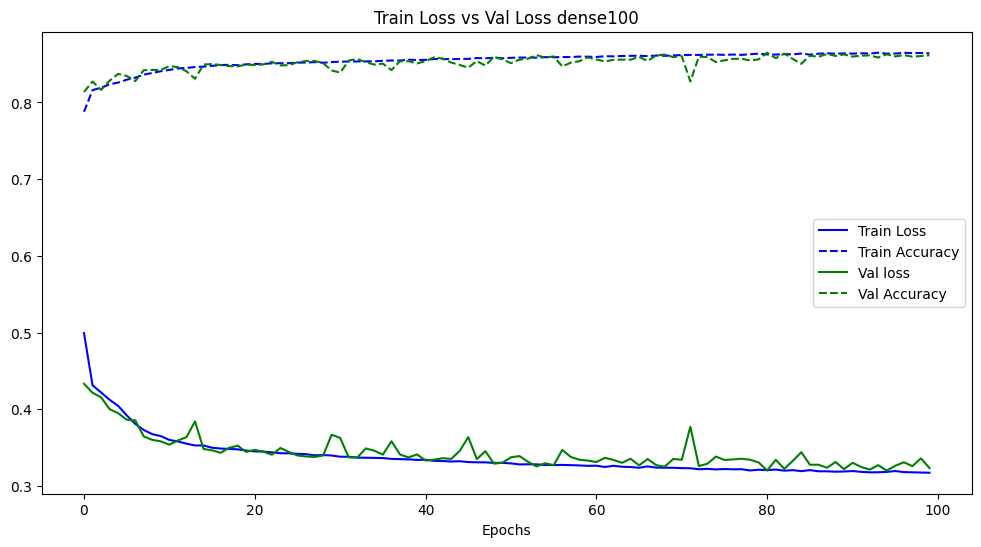

In [72]:
plt.figure(figsize=(12,6))
plt.plot(history1.history['loss'], label = 'Train Loss', color = 'b')
plt.plot(history1.history['accuracy'], label = 'Train Accuracy', linestyle = 'dashed', color = 'b')
plt.plot(history1.history['val_loss'], label = 'Val loss', color = 'g')
plt.plot(history1.history['val_accuracy'], label = 'Val Accuracy', linestyle = 'dashed', color = 'g')
plt.title(f'Train Loss vs Val Loss {model1.name}')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [73]:
preds = model1.predict(X_test)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]

1182/1182 [==============================] - 0s 228us/step


In [75]:
metrics_dict = {'test_accuracy': np.round(accuracy_score(y_test, prediction_classes),2),
'test_precision': np.round(precision_score(y_test, prediction_classes),2),
'test_recall': np.round(recall_score(y_test, prediction_classes),2),
'test_f1': np.round(f1_score(y_test, prediction_classes),2)}

print(f"'{model1._name}' Model Metrics")
print('-'*150)
print(metrics_dict)
print('='*150)

'dense100' Model Metrics
------------------------------------------------------------------------------------------------------------------------------------------------------
{'test_accuracy': 0.86, 'test_precision': 0.89, 'test_recall': 0.89, 'test_f1': 0.89}


In [76]:
# Confusion Matrix
cm = confusion_matrix(y_test, prediction_classes)
#print(cm)
cmtx = pd.DataFrame(cm, index = ['True: 0', 'True: 1'], columns = ['Pred: 0', 'Pred: 1'])
print('Confusion Matrix')
print(cmtx)

Confusion Matrix
         Pred: 0  Pred: 1
True: 0    12002     2595
True: 1     2599    20608


We see that the accuracy is quite low and the confusion matrix shoes that nearly all test instances are being predicted as class '1'. This indicates that the even threshold of 0.5 is not adequate for this model prediction. We will find the optimal threshold by maximizing the G-Means ratio. 

1182/1182 [==============================] - 0s 231us/step

Best Threshold = 0.610274, G-Mean=0.866


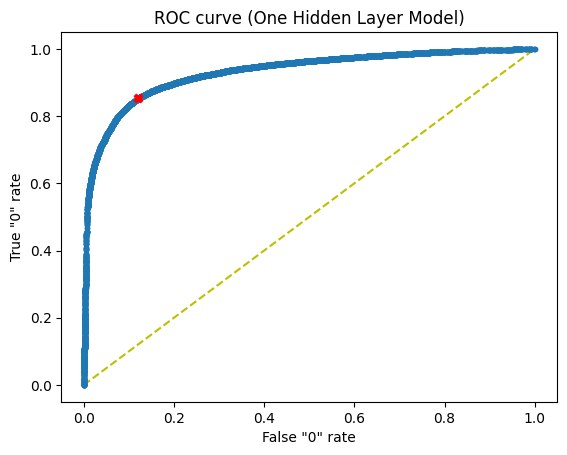

In [77]:
# ROC Curve
y_preds = model1.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('\nBest Threshold = %f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


plt.figure()
plt.plot([0,1],[0,1],'y--', zorder = 1)
plt.plot(fpr, tpr, marker = '.', zorder = 2)
plt.scatter(fpr[ix], tpr[ix], marker='X', color='red', label='Best Treshold Ratio', zorder = 3)
plt.xlabel('False "0" rate')
plt.ylabel('True "0" rate')
plt.title('ROC curve (One Hidden Layer Model)')
plt.show()

In [78]:
preds = model1.predict(X_test)
prediction_classes = [1 if prob > thresholds[ix] else 0 for prob in np.ravel(preds)]

1182/1182 [==============================] - 0s 232us/step


In [79]:
metrics_dict = {'test_accuracy': np.round(accuracy_score(y_test, prediction_classes),2),
'test_precision': np.round(precision_score(y_test, prediction_classes),2),
'test_recall': np.round(recall_score(y_test, prediction_classes),2),
'test_f1': np.round(f1_score(y_test, prediction_classes),2)}

print(f"'{model1._name}' Model Metrics")
print('-'*150)
print(metrics_dict)
print('='*150)

'dense100' Model Metrics
------------------------------------------------------------------------------------------------------------------------------------------------------
{'test_accuracy': 0.86, 'test_precision': 0.92, 'test_recall': 0.85, 'test_f1': 0.88}


In [80]:
# Confusion Matrix
cm = confusion_matrix(y_test, prediction_classes)
#print(cm)
cmtx = pd.DataFrame(cm, index = ['True: 0', 'True: 1'], columns = ['Pred: 0', 'Pred: 1'])
print('Confusion Matrix')
print(cmtx)

Confusion Matrix
         Pred: 0  Pred: 1
True: 0    12846     1751
True: 1     3422    19785
